# Make a simple Skewt plot


To start the process we need to install the main packages, the first one contain the meteorological processor and the second one have the radiosonde's database:
- ![metpy](https://unidata.github.io/MetPy/latest/index.html)
- ![siphon](https://pypi.org/project/siphon/)

In [1]:
!pip install metpy
!pip install siphon

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Run the packages
- **datetime** package to define the interval time to work.
- **matplotlib** package to manipulate the plots
- **metpy** package to help us with the meteorlogical calcs
- **numpy** package to work with numerical data
- **siphon** package to require the radiosonde information

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

Defining the time to study, require the database and verifying the data keys

In [3]:
dt = datetime(2018, 11, 8, 12)
station = '83649'
data = WyomingUpperAir.request_data(dt, station)
df = pandas_dataframe_to_unit_arrays(data)
print(df.keys())

dict_keys(['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed', 'u_wind', 'v_wind', 'station', 'station_number', 'time', 'latitude', 'longitude', 'elevation', 'pw'])


Assigning meteorological variables to a specific variables to easily manipulate.

In [4]:
p = df['pressure']
T = df['temperature']
Td = df['dewpoint']
u = df['u_wind']
v = df['v_wind']

In [6]:
skew.plot_mixing_lines?

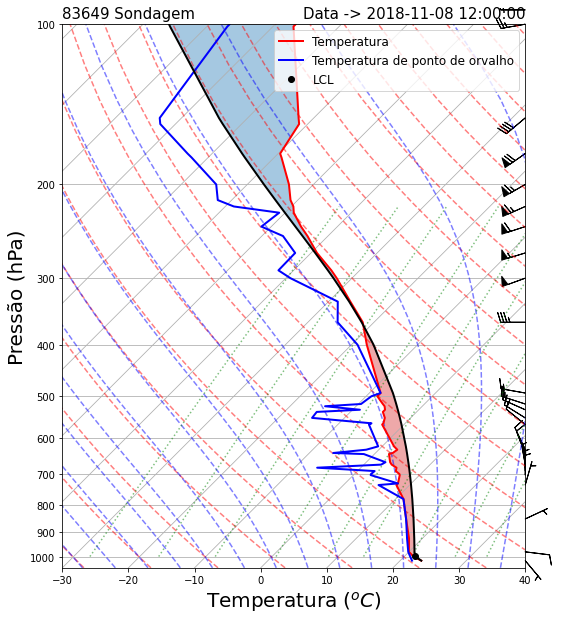

In [8]:
pth = '../'

fig = plt.figure(figsize=(9,10))
skew = SkewT(fig, rotation=45)
skew.plot(p, T, 'r', lw=2, label='Temperatura')
skew.plot(p, Td, 'b', lw=2, label='Temperatura de ponto de orvalho')
skew.plot_barbs(p[::2], u[::2], v[::2], y_clip_radius=0.03)
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1050, 100)
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10)*units.K, alpha=0.5, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5)*units.K, alpha=0.5, color='green')
skew.plot_mixing_lines(pressure=np.arange(1000, 200, -20)*units.hPa, alpha=0.5, color='purple', linestyle='dotted')
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black', label='LCL')
# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, prof)
skew.shade_cape(p, T, prof)

plt.title('{} Sondagem'.format(station), fontsize=15, loc='left')
plt.title('Data -> {}'.format(dt), fontsize=15, loc='right')
plt.xlabel('Temperatura ($^oC$)', fontsize=20)
plt.ylabel('Pressão (hPa)', fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig(pth+str(dt),facecolor='w')